In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
%load_ext autoreload
%autoreload 2
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
n_vis = 10  # Number of visible neurons.
n_hid = 9  # Number of hidden neurons.

ratio = n_hid / n_vis  # Expressive power.

W = np.random.random((n_hid, n_vis))  # Weights matrix.
b = np.random.random(n_vis)  # Biases to visible neurons.
c = np.random.random(n_hid)  # Biases to hidden neurons.

params = {
    "lambda": {
        "W": np.random.random((n_hid, n_vis)),
        "b": np.random.random(n_vis),
        "c": np.random.random(n_hid)
    },

    "mu": {
        "W": np.random.random((n_hid, n_vis)),
        "b": np.random.random(n_vis),
        "c": np.random.random(n_hid)
    }
}

print(ratio)
params

0.9


{'lambda': {'W': array([[ 0.71143938,  0.35667169,  0.51388251,  0.51597061,  0.74391432,
           0.57375037,  0.91804412,  0.78683538,  0.88246277,  0.94429684],
         [ 0.51826907,  0.58924707,  0.89764979,  0.62342976,  0.60042424,
           0.65173388,  0.63075981,  0.77890825,  0.44969465,  0.26974775],
         [ 0.92099754,  0.41452814,  0.15916263,  0.69980651,  0.71328361,
           0.0683282 ,  0.55835695,  0.90217247,  0.90029251,  0.75950978],
         [ 0.44271607,  0.55729941,  0.01143648,  0.59847799,  0.68506471,
           0.41193504,  0.14777845,  0.74002431,  0.79877703,  0.57343152],
         [ 0.6205385 ,  0.8702797 ,  0.11976843,  0.17702684,  0.57380803,
           0.03754941,  0.72217834,  0.65323185,  0.27116806,  0.18783315],
         [ 0.28163821,  0.50200395,  0.25240561,  0.9160286 ,  0.68815773,
           0.03146331,  0.71046507,  0.09419587,  0.07440979,  0.24179717],
         [ 0.39213419,  0.1457425 ,  0.12783516,  0.52220231,  0.65887201,
    

# Dataset generation for simplest W state

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


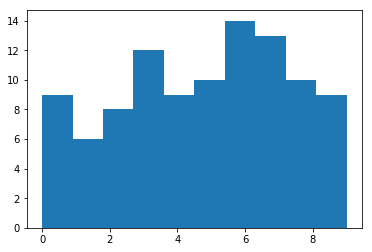

In [161]:
num_samples = 100

sparsed_states = np.eye(n_vis)
random_indices = np.random.randint(0, n_vis, num_samples)
dataset = []
for i in random_indices:
    dataset.append(sparsed_states[i])
    
print(dataset[0])

plt.hist(random_indices, bins=n_vis);

In [162]:
def grad_lambda_ksi(dataset, params):
    """(A14) of arxive paper. (13) of Nature paper.
    
    """
    res = averaged_D_lambda_p_lambda(dataset, params)

    N_b = 1  # TODO: In this version we have only one basis, but in general: N_b = len(datasets).
    res['W'] *= N_b
    res['b'] *= N_b
    res['c'] *= N_b
    
    # Due to we have only one basis we calculate just one component.
    tmp = averaged_D_lambda_Q_b(dataset, params)
    tmp['W'] = tmp['W'].real / len(dataset)
    tmp['b'] = tmp['b'].real / len(dataset)
    tmp['c'] = tmp['c'].real / len(dataset)
    
    res['W'] -= tmp['W']
    res['b'] -= tmp['b']
    res['c'] -= tmp['c']
    return res

In [163]:
grad_lambda_ksi(dataset, params)

{'W': array([[ 0.0648447 ,  0.03906119,  0.05485429,  0.08211236,  0.06550067,
          0.06993967,  0.10567464,  0.09526263,  0.07567936,  0.06909167],
        [ 0.06117495,  0.04198745,  0.06078259,  0.08461574,  0.06280334,
          0.07139242,  0.09791084,  0.0948902 ,  0.06688462,  0.0565522 ],
        [ 0.07018821,  0.04140874,  0.05071031,  0.08941331,  0.06703476,
          0.06136989,  0.09947776,  0.10068716,  0.07809275,  0.06808036],
        [ 0.05542498,  0.03880978,  0.04127869,  0.07854077,  0.06039239,
          0.06144185,  0.07596349,  0.08837797,  0.06980571,  0.05843383],
        [ 0.07091866,  0.04986048,  0.05616396,  0.08541797,  0.07033824,
          0.06858521,  0.11192725,  0.10280873,  0.07308287,  0.06429451],
        [ 0.06122448,  0.04381947,  0.05434743,  0.09608674,  0.0684166 ,
          0.06309226,  0.10626613,  0.08286652,  0.06384717,  0.06080388],
        [ 0.06117437,  0.03780057,  0.05008376,  0.08522178,  0.06607935,
          0.06593119,  0.10